## NLP Project: Fake Job Postings  Analysis

<ol>
<li> <b> Problem Statement </b> </li>
</ol>


<ol start="2">
<li> <b> Import python dependencies   </b> </li>
</ol>


<ol   start="3">
<li> <b> Data Collection </b> </li>
</ol>


<ul>
<li>Load the data set</li>
<li>Explore the data</li>
<li>summary statistic</li>
</ul>


<ol start="4">
 <li><b> Cleaning, transforming and visualizing</b></li>
 </ol>
 
 <ul>
<li>Check missing values</li>
<li> Check the percentage of missing values </li>
<li> Distribution of the labels of fraudulent variables </li>
<li> Visualization of the lables  </li>
</ul>

<ol start="5">
 <li><b> Text- preprocessing </b> </li>
 </ol>
 <ul>
<li>Put words into lowercase </li>
<li> Remove Stops words </li>
<li> Tokenize words</li>
<li> Stemming words </li>
<li> WorldCloud</li>
</ul>

<ol start="6">
 <li><b> Modeling </b> </li>
 </ol>
 
 <ul>
<li> 6.1: Part One: Apply TfidfVectorizer  </li>

</ul>
 
 
 <ul>
<li> Split the data set  </li>
<li> First model: Naive bayes  </li>
<li> Second model: Logistic Regression  </li>
<li> Third model: Decision Tree  </li>
<li> Fouth model: RandomForest </li>
 <li> The AUC curve   </li>
</ul>

<ul>
 <li> 6.2 Part two: Apply CountVectorizer</li>
 </ul>
 
 <ul>
<li> Split the data set  </li>
<li> First model: Naive bayes  </li>
<li> Second model: Logistic Regression  </li>
<li> Third model: Decision Tree  </li>
<li> Fouth model: RandomForest </li>
 <li> The AUC curve   </li>
</ul>

<ol start="7">
 <li><b> Documentation </b> </li>
 </ol>

### 1. Problem Statement 

<p>Apply to job postings online is one way for job seekers to get hired for their dream job. However, online jobs are not always real. There are a lot of fake jobs out there. Why do fake jobs posting exist? There are several reasons, but we will mention two major causes of this phenomenon. Companies posted fake jobs to gauge the current talent pool and see their attractiveness on the market. Also, scammers post fake jobs to attract job seekers in order to steal their personnel information and sell them on the internet. We develop a Machine Learning(ML) model using  Natural Language Processing(NLP) techniques to predict whether the job posting is fraudulent or real.</p>

### 2. Import python dependencies 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import unicodedata, string,re
import nltk
# import nltk modules 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import ngrams

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
# import the evaluation metrics 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# the different  model  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings,os

### 3. Data Collection 

**We can find the dataset for this project on Kaggle Website:Url Fake Job_posting: <font color='red'> https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction/code </font>.
This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs.**

In [2]:
# import the data set
data = pd.read_csv("/Users/kouamengoran/desktop/fake_job_postings.csv")

#### 3.1 Explore the data set 

In [3]:
# The shape of the data set 
data.shape

(17880, 18)

**The data has<font color= 'red'> 17880 </font> rows and <font color= 'red'>18</font> columns**

In [4]:
#Check the five first observations 
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
# The columns of the data  
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
# Summary statistic of object variables 
data.describe(include=['object'])

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17880,17534,6333,2868,14572,17879,15185,10670,14409,10830,9775,12977,11425
unique,11231,3105,1337,874,1709,14801,11968,6205,5,7,13,131,37
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,311,718,551,142,726,379,410,726,11620,3809,5145,1734,1749


#### 4 Cleaning, transforming and visualizing

#### 4.1 Missing values 

In [7]:
# check the  NAN and the variables types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
# Check the percentage  of the NAN in each variable 
round(data.isnull().sum()/17880,5)

job_id                 0.00000
title                  0.00000
location               0.01935
department             0.64581
salary_range           0.83960
company_profile        0.18501
description            0.00006
requirements           0.15073
benefits               0.40324
telecommuting          0.00000
has_company_logo       0.00000
has_questions          0.00000
employment_type        0.19413
required_experience    0.39430
required_education     0.45330
industry               0.27422
function               0.36102
fraudulent             0.00000
dtype: float64

**<font color='red'>84%</font> of the salary variable is null and<font color='red'> 65% </font>of the department variable is null. The Percentage of NAN in the benefits and required_education variables are respectively<font color='red'> 40%</font> and<font color='red'> 45%</font>.**

**We will use the description column to predict if the job_posted is fraudulent.Therefore, we will drop the unnecessary variables.**


In [9]:
# Create a list of the features to drop 
feature_to_drop= ['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function']

In [10]:
# drop the features 
data.drop(feature_to_drop, axis=1, inplace= True)
data.columns

Index(['description', 'fraudulent'], dtype='object')

In [11]:
#Distribution of labels of fraudulent variable
data.fraudulent.value_counts()/data.shape[0]

0    0.951566
1    0.048434
Name: fraudulent, dtype: float64

#### 4. 2. Visualization of the distribution 

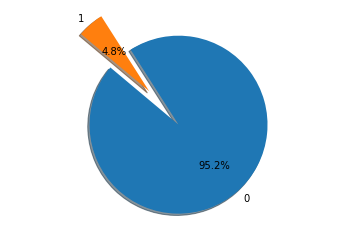

In [12]:

s=data.fraudulent.value_counts()/data.shape[0]
plt.pie(s, labels=[0,1], 
        autopct='%1.1f%%', shadow=True,explode = [0, 0.5], startangle=140)
plt.axis('equal')
plt.show()

**<font color='red'>4.8%</font> of the job description is fraudulent. We have class imbalance data.**

In [13]:
# Check the  different sentence in the  description  variables 
data.description.nunique()

14801

**The description column contains <font color='red'> 14801 </font>unique sentences** 

#### 4.3 Dropping missing

In [14]:
data['description'].dropna()

0        Food52, a fast-growing, James Beard Award-winn...
1        Organised - Focused - Vibrant - Awesome!Do you...
2        Our client, located in Houston, is actively se...
3        THE COMPANY: ESRI – Environmental Systems Rese...
4        JOB TITLE: Itemization Review ManagerLOCATION:...
                               ...                        
17875    Just in case this is the first time you’ve vis...
17876    The Payroll Accountant will focus primarily on...
17877    Experienced Project Cost Control Staff Enginee...
17878    Nemsia Studios is looking for an experienced v...
17879    Who are we?Vend is an award winning web based ...
Name: description, Length: 17879, dtype: object

In [15]:
data.isnull().sum()

description    1
fraudulent     0
dtype: int64

In [16]:
data= data.dropna()

In [17]:
data.isna().sum()

description    0
fraudulent     0
dtype: int64

### 5. Text-preprocessing 

In [18]:
data.description.unique()

array(['Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff',
       "Organised - Focused - Vibrant - Awesome!Do you have a passion for customer s

**5.1 Put the words in the description columns in lowercase**

In [19]:
data['description'] = data['description'].str.lower()
data.description[0]

'food52, a fast-growing, james beard award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its new york city headquarters.reproducing and/or repackaging existing food52 content for a number of partner sites, such as huffington post, yahoo, buzzfeed, and more in their various content management systemsresearching blogs and websites for the provisions by food52 affiliate programassisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriessupporting with pr &amp; events when neededhelping with office administrative work, such as filing, mailing, and preparing for meetingsworking with developers to document bugs and suggest improvements to the sitesupporting the marketing and executive staff'

In [20]:
data.description[1]

"organised - focused - vibrant - awesome!do you have a passion for customer service? slick typing skills? maybe account management? ...and think administration is cooler than a polar bear on a jetski? then we need to hear you!\xa0we are the cloud video production service and opperating on a glodal level. yeah, it's pretty cool. serious about\xa0delivering a world class product and excellent customer service.our rapidly expanding business is looking for a talented project manager to manage the successful delivery of video projects, manage client communications and drive the production process. work with some of the coolest brands on the planet and learn from a global team that are representing nz is a huge way!we are entering the next growth stage of our business and growing quickly internationally. \xa0therefore, the position is bursting with opportunity for the right person entering the business at the right time.\xa090 seconds, the worlds cloud video production service -\xa0http://90

**5.2 Function to remove English StopWords, tokenize,and stem the words** 

In [21]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
stops = set(stopwords.words("english"))    
def define_tokens(row):
    review = row
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stops]
    stemmed_list = [stemming.stem(word) for word in meaningful_words]
    joined_words = (' '.join(stemmed_list))
    return joined_words

**Apply the function to the description column**

In [22]:
data['description'] = data['description'].apply(define_tokens)

In [23]:
#check the first row 
data['description'][0]

'jame beard onlin food commun curat recip hub current interview unpaid intern work small team editor execut develop new york citi repackag exist content number partner site huffington post yahoo buzzfe variou content manag systemsresearch blog websit provis affili programassist affili program support screen affili assist affili inquiriessupport pr amp event neededhelp offic administr work file mail prepar meetingswork develop document bug suggest improv sitesupport market execut staff'

In [24]:
# Check the third row
data['description'][2]

'client locat houston activ seek experienc commiss machineri assist possess strong supervisori skill attent detail strong dedic safeti must ideal candid execut activ compli qualiti requir health environment safeti regul'

**5.3 WourldCloud**

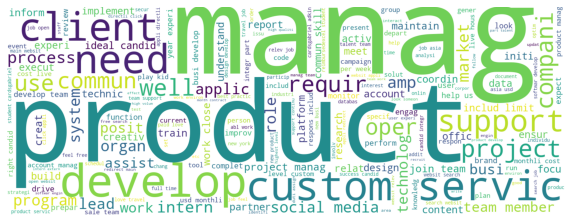

In [25]:
data['description'] = data['description'].astype('str')
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

target_text = " ".join(data['description'])
wordcloud = WordCloud(background_color='white',width=1600, height=600).generate(text=target_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud )
plt.axis("off")
plt.show()

In [26]:
text_list=[]  
for index, row in data.iterrows(): 
    text_list.append((row['description'])) 
text_list

total_words=''.join(text_list)
total_words=word_tokenize(total_words)

In [27]:
freq_words=FreqDist(total_words)
word_frequency=FreqDist(freq_words)

<AxesSubplot:>

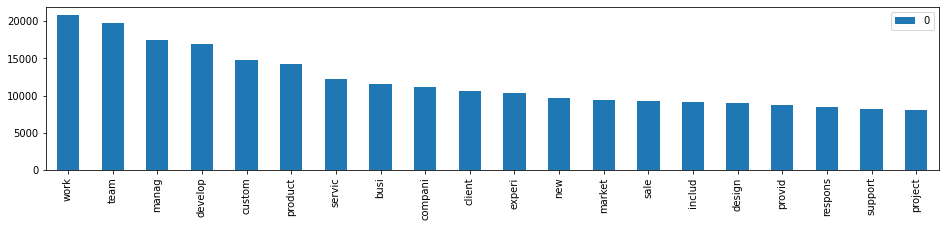

In [28]:
pd.DataFrame(word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,3),grid=False)

**WordCloud for fraudulent job postings**

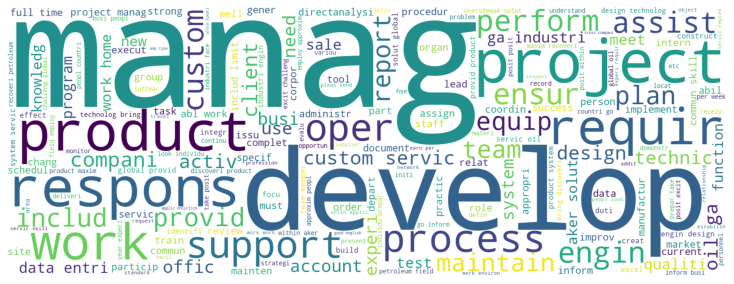

In [29]:
word_cloud_common_words=[]  
for index, row in data[data['fraudulent']==1].iterrows(): 
    word_cloud_common_words.append((row['description'])) 
word_cloud_common_words

wordcloud = WordCloud(width = 1600, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 5).generate(''.join(word_cloud_common_words)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [30]:
fraudulent_list=[]  
for index, row in data[data['fraudulent']==1].iterrows(): 
    fraudulent_list.append((row['description'])) 
fraudulent_list
total_fraudulent_words=' '.join(fraudulent_list)
total_fraudulent_words= word_tokenize(total_fraudulent_words)

In [31]:
freq_words=FreqDist(total_fraudulent_words)
word_frequency=FreqDist(freq_words)

In [32]:
word_frequency

FreqDist({'work': 1169, 'manag': 989, 'product': 787, 'servic': 728, 'amp': 695, 'custom': 675, 'posit': 631, 'provid': 595, 'project': 592, 'develop': 556, ...})

<AxesSubplot:>

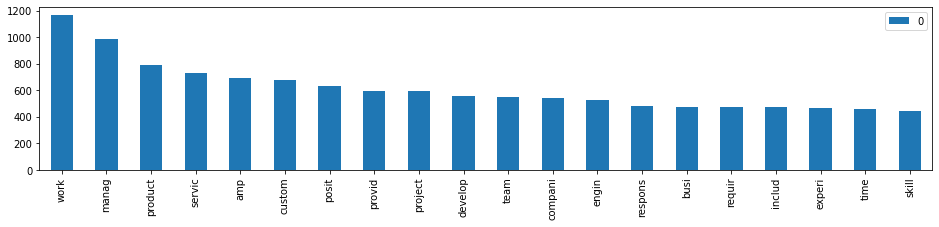

In [33]:
pd.DataFrame(word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,3),grid=False)

#### WordCloud for Real job description 

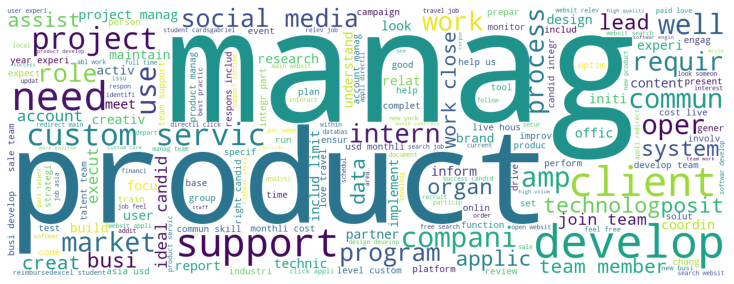

In [34]:
word_cloud_common_words=[]  
for index, row in data[data['fraudulent']==0].iterrows(): 
    word_cloud_common_words.append((row['description'])) 
word_cloud_common_words

wordcloud = WordCloud(width = 1600, height = 600, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 5).generate(''.join(word_cloud_common_words)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [35]:
real_list=[]  
for index, row in data[data['fraudulent']==0].iterrows(): 
    real_list.append((row['description'])) 
real_list
total_real_words=' '.join(real_list)
total_real_words= word_tokenize(total_real_words)

In [36]:
freq_words=FreqDist(total_real_words)
word_frequency=FreqDist(freq_words)

In [37]:
word_frequency

FreqDist({'work': 19864, 'team': 19582, 'manag': 16664, 'develop': 16574, 'custom': 14636, 'product': 13652, 'servic': 11754, 'busi': 11217, 'compani': 10992, 'client': 10745, ...})

<AxesSubplot:>

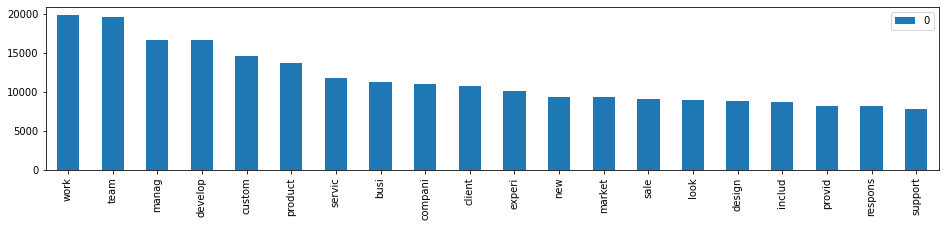

In [38]:
pd.DataFrame(word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,3),grid=False)

### 6. Machine Learning Models

#### 6. 1 Part one : Applying TfidfVectorizer 

**The target variable**

In [39]:
y = data['fraudulent'].to_numpy()

**Apply the Tfidf techniques to description column**

In [40]:
tfidf = TfidfVectorizer(decode_error='ignore')
X = tfidf.fit_transform(data['description'].values.astype('U'))
X.shape

(17879, 45548)

**Split the data into train_set and test_set** 

In [41]:
X_train, X_test, y_train, y_test= train_test_split(X , y,  test_size=0.33, random_state=0 )

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11978, 45548), (5901, 45548), (11978,), (5901,))

**First Model:<font color='red'>  Naive Bayes Classifier</font>.** 

**Instantiate the model and fit the model** 

In [43]:
modelNB = MultinomialNB()
modelNB.fit(X_train,y_train)

MultinomialNB()

**Predict, confusion matrix, accuracy score**

In [44]:
y_pred = modelNB.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('Classification Report')
print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("TNR:",metrics.precision_score(y_test, y_pred))
print("NPV:",metrics.recall_score(y_test, y_pred))

Confusion Matrix
[[5624    6]
 [ 271    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5630
           1       0.00      0.00      0.00       271

    accuracy                           0.95      5901
   macro avg       0.48      0.50      0.49      5901
weighted avg       0.91      0.95      0.93      5901

Accuracy: 0.9530588035926114
TNR: 0.0
NPV: 0.0


**Second Model: <font color='red'>Logistic Regression</font>**

**Instantiate and fit the model**

In [45]:
Lr= LogisticRegression()
Lr.fit(X_train, y_train)

LogisticRegression()

**Predict , Confusion matrix , classification Report, and accuracy**

In [46]:
y_pred = Lr.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('Classification Report')
print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("TNR:",metrics.precision_score(y_test, y_pred))
print("NPV:",metrics.recall_score(y_test, y_pred))

Confusion Matrix
[[5628    2]
 [ 203   68]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5630
           1       0.97      0.25      0.40       271

    accuracy                           0.97      5901
   macro avg       0.97      0.63      0.69      5901
weighted avg       0.97      0.97      0.96      5901

Accuracy: 0.9652601254024742
TNR: 0.9714285714285714
NPV: 0.25092250922509224


**Third Model: <font color='red'> Decision Tree</font>**

**Instantiate and fit the decision tree model** 

In [47]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

**Predict , Confusion matrix , classification Report, and accuracy**

In [48]:
y_pred = dt.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('Classification Report')
print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("TNR:",metrics.precision_score(y_test, y_pred))
print("NPV:",metrics.recall_score(y_test, y_pred))

Confusion Matrix
[[5543   87]
 [  92  179]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5630
           1       0.67      0.66      0.67       271

    accuracy                           0.97      5901
   macro avg       0.83      0.82      0.83      5901
weighted avg       0.97      0.97      0.97      5901

Accuracy: 0.969666158278258
TNR: 0.6729323308270677
NPV: 0.6605166051660517


**Fourth Model: <font color='red'>RandomForest</font>**

**Instantiate and fit the model** 

In [49]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

**Predict , Confusion matrix , classification Report, and accuracy**

In [50]:
y_pred = rf.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('Classification Report')
print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("TNR:",metrics.precision_score(y_test, y_pred))
print("NPV:",metrics.recall_score(y_test, y_pred))

Confusion Matrix
[[5629    1]
 [ 121  150]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5630
           1       0.99      0.55      0.71       271

    accuracy                           0.98      5901
   macro avg       0.99      0.78      0.85      5901
weighted avg       0.98      0.98      0.98      5901

Accuracy: 0.9793255380443993
TNR: 0.9933774834437086
NPV: 0.5535055350553506


**The visualization of the target variable showed that we have a class imbalance data set. Therefore accuracy is not the best metric to evaluate the performance of the different models. We will use<font color= 'red'> the Area Under the Roc Curve (AUC)</font> metric to evaluate our models.**

**AUC Curve**

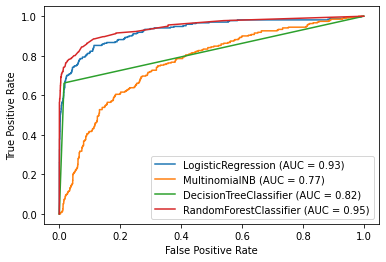

In [51]:
disp =plot_roc_curve(Lr, X_test, y_test);
plot_roc_curve(modelNB, X_test, y_test,ax= disp.ax_);
plot_roc_curve(dt , X_test, y_test, ax=disp.ax_);
plot_roc_curve(rf, X_test, y_test,ax= disp.ax_);

#### 6. 2 Part two : Applying CountVectorizer 

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
X = cv.fit_transform(data['description'].values.astype('U'))

In [53]:
X.shape

(17879, 45548)

In [54]:
# Split the data set into the train and text set 
X_train, X_test, y_train, y_test= train_test_split(X , y,  test_size=0.33, random_state=0 )

In [55]:
# Shape of the split 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11978, 45548), (5901, 45548), (11978,), (5901,))

#### Machine Learning Model 

**First model: <font color='blue'>Naive Bayes</font>** 

In [56]:
y_pred = modelNB.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('Classification Report')
print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("TNR:",metrics.precision_score(y_test, y_pred))
print("NPV:",metrics.recall_score(y_test, y_pred))

Confusion Matrix
[[5616   14]
 [ 271    0]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5630
           1       0.00      0.00      0.00       271

    accuracy                           0.95      5901
   macro avg       0.48      0.50      0.49      5901
weighted avg       0.91      0.95      0.93      5901

Accuracy: 0.9517031011692934
TNR: 0.0
NPV: 0.0


**Second Model:  <font color='blue'>Logistic Regression</font>** 

y_pred = Lr.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('Classification Report')
print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("TNR:",metrics.precision_score(y_test, y_pred))
print("NPV:",metrics.recall_score(y_test, y_pred))

**Third Model: <font color='blue'>Decision Tree</font>**

In [57]:
y_pred = dt.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('Classification Report')
print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("TNR:",metrics.precision_score(y_test, y_pred))
print("NPV:",metrics.recall_score(y_test, y_pred))

Confusion Matrix
[[2634 2996]
 [  72  199]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.47      0.63      5630
           1       0.06      0.73      0.11       271

    accuracy                           0.48      5901
   macro avg       0.52      0.60      0.37      5901
weighted avg       0.93      0.48      0.61      5901

Accuracy: 0.48008812065751566
TNR: 0.062284820031298906
NPV: 0.7343173431734318


**Fourth Model: <font color='blue'>RandomForest</font>**

In [58]:
y_pred = rf.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

print('Classification Report')
print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("TNR:",metrics.precision_score(y_test, y_pred))
print("NPV:",metrics.recall_score(y_test, y_pred))

Confusion Matrix
[[5382  248]
 [  92  179]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5630
           1       0.42      0.66      0.51       271

    accuracy                           0.94      5901
   macro avg       0.70      0.81      0.74      5901
weighted avg       0.96      0.94      0.95      5901

Accuracy: 0.9423826470089816
TNR: 0.41920374707259955
NPV: 0.6605166051660517


**AUC curve**

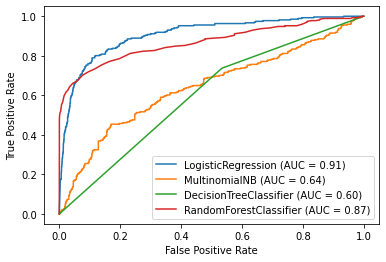

In [59]:
disp =plot_roc_curve(Lr, X_test, y_test);
plot_roc_curve(modelNB, X_test, y_test,ax= disp.ax_);
plot_roc_curve(dt , X_test, y_test, ax=disp.ax_);
plot_roc_curve(rf, X_test, y_test,ax= disp.ax_);

### 7 Documentation 

**We use, for this project, two feature extraction from text techniques: Tfidf and CountVectorizer. We employ four machine learning algorithms to train the data: Naive Bayes, Logistic Regression, Decision Tree, and RandomForest. The Tfidf technique provides the best accuracy and AUC score. Since we have class imbalance data, we retain the AUC as an evaluation metric. Thus, Logistic Regression and RandomForest are the best models with an AUC of 94% 
Also, the words that appear the most in fraudulent job postings are:<font color = 'red'> manager, develop, project, product, services, customer, position, provide, work, team, support ,require, experience, include, companies</font>.**
  
**We will use the same data in a deep learning model to see if we can increase the model performance**
